# Prediction using Supervised ML

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
%matplotlib inline

In [2]:
# Importing the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


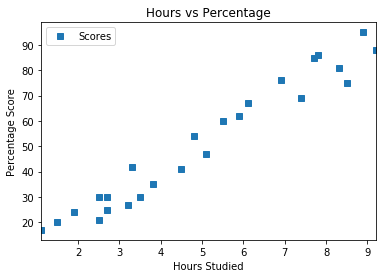

In [3]:
# Checking for relationship between data
data.plot(x='Hours', y='Scores', style='s')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Hence, we see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Now we get the input and output**

In [4]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

**Forming training and test splits**

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

**Training**

In [6]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Plotting regression line**

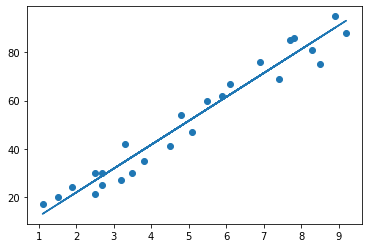

In [7]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

**Predictions**

In [8]:
y_pred = regressor.predict(x_test)

**Actual vs Predictions**

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


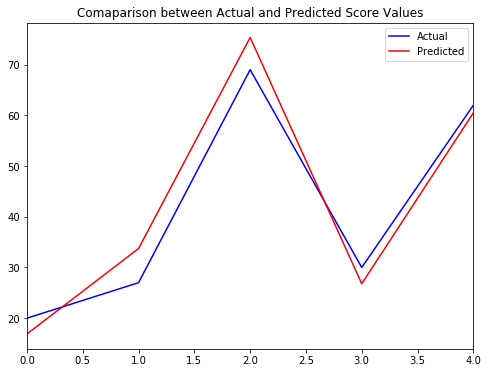

In [10]:
df.plot(kind='line',figsize=(8,6), color=["B", "R"], title= "Comaparison between Actual and Predicted Score Values")

**What will be predicted score if a student studies for 9.25 hrs/ day?**


In [11]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the model**

In [12]:
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Square Error:",rmse)

mse = (mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:",mse)

R-Square: 0.9454906892105354
Root Mean Square Error: 4.647447612100373
Mean Absolute Error: 4.183859899002982
